# HR Data Analysis

Vizualise the factors contributing to Employee retention, Employee turnover and look for secret patterns in the dataset. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv',index_col=None)

In [3]:
#df = pd.read_csv("HR_comma_sep.csv")
df.head() #first 5 rows 
#df.tail(10) # last 10 rows
#df.tail()   # last  5 rows

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Missing values in dataset (0 means it is a clean dataset)

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
df.shape

(14999, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df['left'] = df['left'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.1+ MB


In [9]:
#left = df[df.left == 1]
#left.shape
df['left'].describe()

count     14999
unique        2
top           0
freq      11428
Name: left, dtype: object

In [10]:
#columns with numerical values
df.describe(include = np.number)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [11]:
#columns witrh categorical values
df.describe(include = np.object)

,left,Department,salary
count,14999,14999,14999
unique,2,10,3
top,0,sales,low
freq,11428,4140,7316


In [12]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [13]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [14]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [15]:
#Separating the numeric and categorical features 
numeric = []
categorical = []
for columns in df.columns.drop(['left']):
    if (df[columns].dtype == 'object'):
        categorical.append(columns)
    else: numeric.append(columns)
        
print(categorical)
print(numeric)

['Department', 'salary']
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


In [16]:
f = pd.melt(df, value_vars = numeric)

C:\Users\pdeov\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pdeov\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pdeov\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

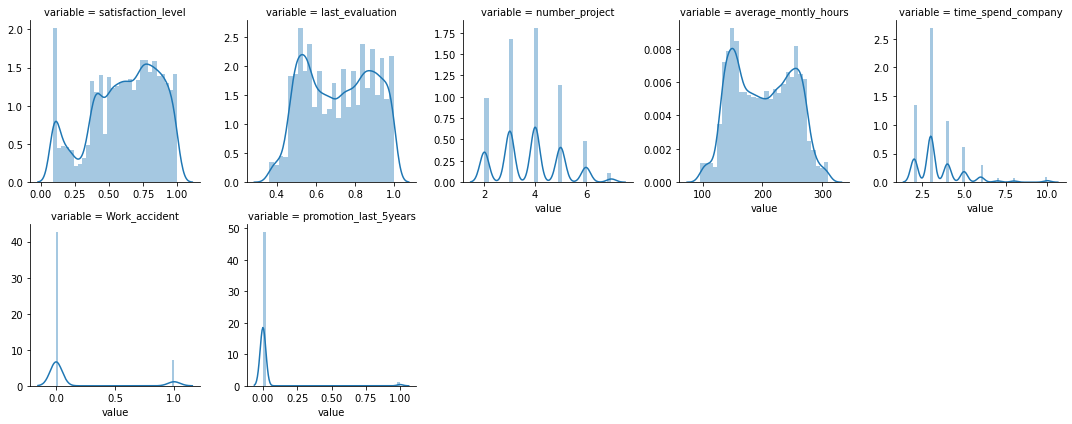

In [17]:
g = sns.FacetGrid(f,col='variable',col_wrap=5,sharex=False, sharey=False)
g = g.map(sns.distplot,'value')

In [18]:
df[numeric].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [19]:
df[categorical].describe()

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [20]:
#Generic function for the plots
def plot_feature(df, col):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    if df[col].dtype != 'object':
        df[col].value_counts().sort_index().plot()
        plt.xlabel(col)
        plt.ylabel('counts')
        plt.subplot(1,2,2)
        sns.boxplot(x='left',y=col,data=df)
        
    
    else:
        sns.countplot(col,data = df)
        plt.xticks(rotation=-45)        
        mosaic(df, [col,'left'],gap=0.01, label_rotation=-45)

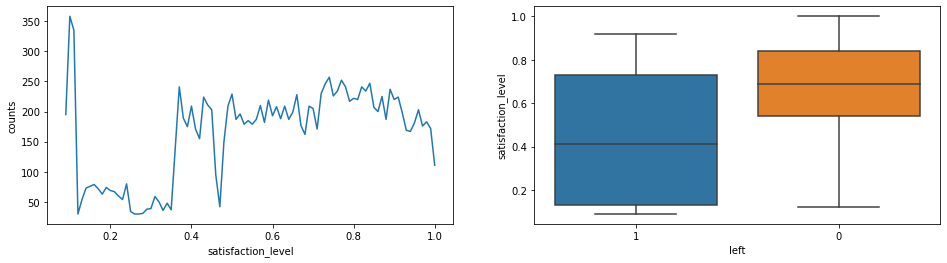

In [21]:
plot_feature(df,'satisfaction_level')

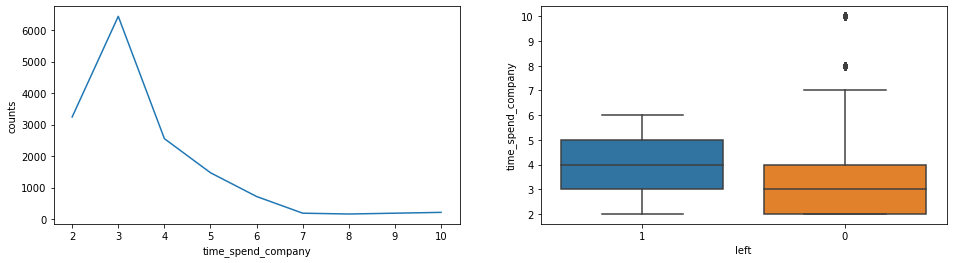

In [22]:
plot_feature(df,'time_spend_company')

C:\Users\pdeov\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


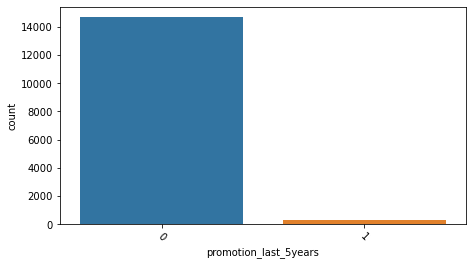

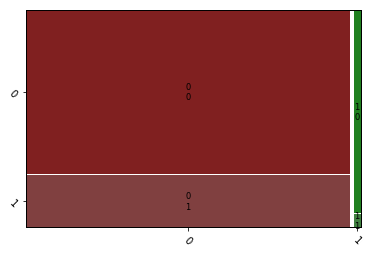

In [23]:
df['promotion_last_5years'] = df['promotion_last_5years'].astype(str)
plot_feature(df,'promotion_last_5years')

C:\Users\pdeov\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


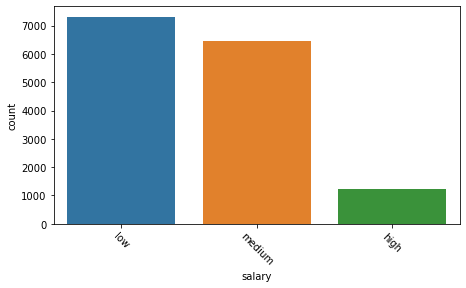

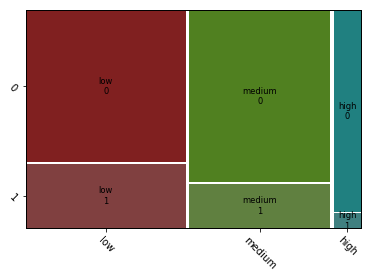

In [24]:
plot_feature(df,'salary')

C:\Users\pdeov\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


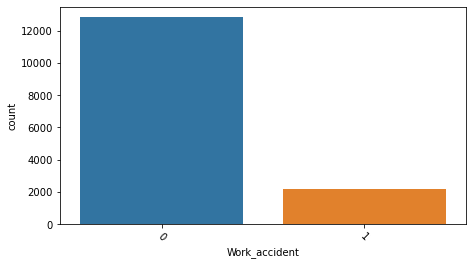

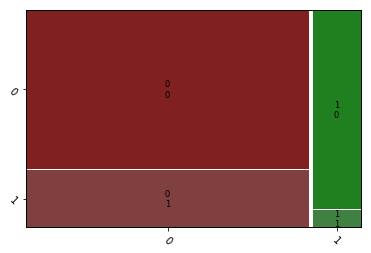

In [25]:
df['Work_accident'] = df['Work_accident'].astype(str)
plot_feature(df,'Work_accident')

C:\Users\pdeov\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

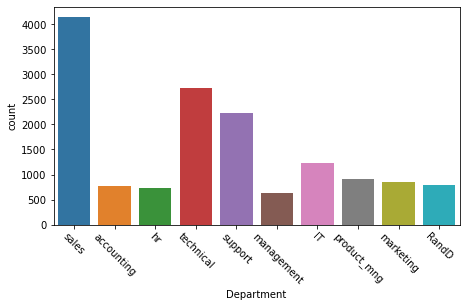

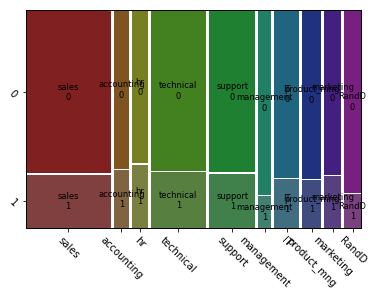

In [26]:
plot_feature(df,'Department')
df['Department'].value_counts()

In [27]:
dept_unique= df['Department'].unique()
for item in dept_unique:
    left = round(df[df['Department'].values == item]['left'].value_counts()[1] / len(df[df['Department'].values == item]['left']),3)
    print (left , item)

0.245 sales
0.266 accounting
0.291 hr
0.256 technical
0.249 support
0.144 management
0.222 IT
0.22 product_mng
0.237 marketing
0.154 RandD


# Satisfaction and Evaluation

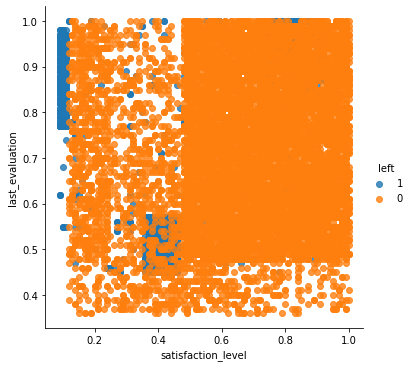

In [28]:
sns.lmplot(x='satisfaction_level', y='last_evaluation', data=df,
           fit_reg=False, # No regression line
           hue='left')   # Color by evolution stage

# Correlation Matrix

In [29]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


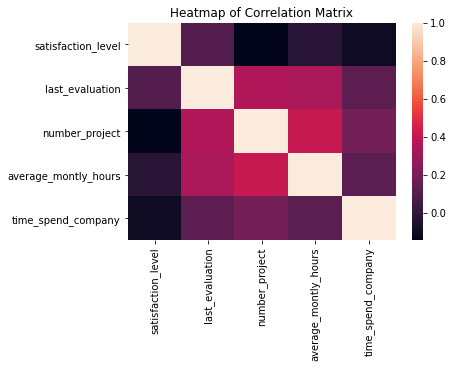

In [30]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

# PerProcessing

Seperate the numerical and the categorical variables and then convert the categorical features to numbers format which will be understood by the model

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  object 
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  object 
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


In [32]:
numerical = []
categorical = []
for column in df.columns.drop('left'):
    if df[column].dtype == 'object':
        categorical.append(column)
    else:
        numerical.append(column)

print("Numerical Features= ",numerical)
print("Categorical features  = ",categorical)

Numerical Features=  ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
Categorical features  =  ['Work_accident', 'promotion_last_5years', 'Department', 'salary']


In [33]:
#Converting the categorical features to dummies
categ_df = pd.get_dummies(df[categorical], drop_first= True)
numer_df = df[numerical]
new_df = pd.concat([categ_df,numer_df], axis= 1 )
new_df.shape

(14999, 18)

In [34]:
new_df.head()

,Work_accident_1,promotion_last_5years_1,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.38,0.53,2,157,3
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.80,0.86,5,262,6
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0.11,0.88,7,272,4
3,0,0,0,0,0,0,0,0,1,0,0,1,0,0.72,0.87,5,223,5
4,0,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.52,2,159,3


We see the total columns is now 18 and that all the categorical features have been converted to numerical features, this will make the data more clearer to the models.

# Modelling 

Splitting the data in test and training sets

In [35]:
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, cross_validate, train_test_split
from sklearn import feature_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [37]:
X = new_df
Y = df['left']
X_train , X_test ,  Y_train , Y_test = train_test_split(X,Y, test_size = 0.15, random_state=100, stratify = Y)

# Logistic Regression

In [38]:
#Let us begin with the basic model of Logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(Y_test, log_reg.predict(X_test)))

Logistic accuracy is 0.80


C:\Users\pdeov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print(classification_report(Y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1714
           1       0.63      0.41      0.50       536

    accuracy                           0.80      2250
   macro avg       0.73      0.67      0.69      2250
weighted avg       0.79      0.80      0.79      2250



# Using Cross-validation for better evaluation

In [40]:
#Area under the curve gives us a better understanding of how a model is performing in the classification problem more than the accuracy score

from sklearn import model_selection
log_reg_cv = LogisticRegression()
kfold = model_selection.KFold(n_splits = 10, random_state = 11)

C:\Users\pdeov\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [41]:
log_Cv_auc = model_selection.cross_val_score(log_reg_cv,X_train, Y_train,cv= kfold,scoring = 'roc_auc')

C:\Users\pdeov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pdeov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [42]:
print("The Logistic Regression AUC: %.3f and the STD is (%.3f)" % (log_Cv_auc.mean(), log_Cv_auc.std()))

The Logistic Regression AUC: 0.816 and the STD is (0.013)


# Decision tree

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
print ("Decision Tree accuracy is %2.2f" % accuracy_score(Y_test, dt.predict(X_test)))

Decision Tree accuracy is 0.98


In [44]:
#using CV
dt_auc = model_selection.cross_val_score(DecisionTreeClassifier(),X_train, Y_train, cv=kfold, scoring= 'roc_auc')
print("The Decision Tree AUC: %.3f and the STD is (%.3f)" % (dt_auc.mean(), dt_auc.std()))

The Decision Tree AUC: 0.974 and the STD is (0.005)


In [45]:
#Confusion Matrix
print(classification_report(Y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1714
           1       0.93      0.97      0.95       536

    accuracy                           0.98      2250
   macro avg       0.96      0.97      0.97      2250
weighted avg       0.98      0.98      0.98      2250



# Random Forest

In [46]:
rf = RandomForestClassifier(class_weight="balanced")

# Fit the RF Model
rf = rf.fit(X_train, Y_train)
print ("Random Forest accuracy is %2.2f" % accuracy_score(Y_test, rf.predict(X_test)))

Random Forest accuracy is 0.99


In [47]:
#using K-fold CV
rf_auc = model_selection.cross_val_score(RandomForestClassifier(), X_train, Y_train, cv= kfold, scoring='roc_auc')

In [48]:
print("The Random Forest AUC: %.3f and the STD is (%.3f)" % (rf_auc.mean(), rf_auc.std()))

The Random Forest AUC: 0.993 and the STD is (0.003)


In [49]:
#Confusion matrix
print(classification_report(Y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.96      0.98       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.99      2250
weighted avg       0.99      0.99      0.99      2250



# XGB Classifier

In [50]:
xgb =  XGBClassifier()
# Fit the XGB Model
xgb.fit(X_train, Y_train)
print ("XGboost Classifier accuracy is %2.2f" % accuracy_score(Y_test, xgb.predict(X_test)))

[13:32:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pdeov\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGboost Classifier accuracy is 0.99


In [51]:
#using K-fold CV
xgb_auc = model_selection.cross_val_score(XGBClassifier(), X_train, Y_train, cv= kfold, scoring='roc_auc')

[13:32:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pdeov\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pdeov\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pdeov\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pdeov\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pdeov\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pdeov\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pdeov\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pdeov\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pdeov\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
print("The XGboost classifiefr AUC: %.3f and the STD is (%.3f)" % (xgb_auc.mean(), xgb_auc.std()))

The XGboost classifiefr AUC: 0.993 and the STD is (0.003)


In [53]:
#Confusion matrix
print(classification_report(Y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.96      0.98       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250



# Support Vector Classifier

In [54]:
from sklearn.svm import SVC 

svclassifier = SVC(kernel='rbf', probability=True)  

svclassifier.fit(X_train,Y_train)
print ("SVC accuracy is %2.2f" % accuracy_score(Y_test, svclassifier.predict(X_test)))

SVC accuracy is 0.78


In [55]:
#using K-fold CV
svc_auc = model_selection.cross_val_score(SVC(), X_train, Y_train, cv= kfold, scoring='roc_auc')
print("The SVC AUC: %.3f and the STD is (%.3f)" % (svc_auc.mean(), svc_auc.std()))

The SVC AUC: 0.807 and the STD is (0.011)


In [56]:
#Confusion matrix
print(classification_report(Y_test, svclassifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1714
           1       0.96      0.09      0.16       536

    accuracy                           0.78      2250
   macro avg       0.87      0.54      0.52      2250
weighted avg       0.82      0.78      0.70      2250



In [57]:
Y_t = np.array(Y_test)

# ROC Graph

C:\Users\pdeov\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


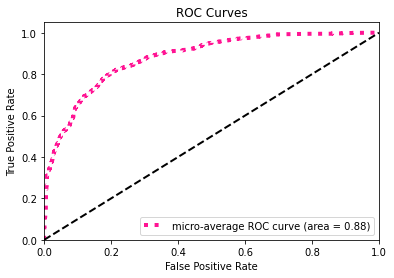

In [58]:
import scikitplot as skplt
#Roc curve for logistic regression
y_log = log_reg.predict_proba(X_test)
skplt.metrics.plot_roc_curve(Y_test, y_log, curves=('micro avg'))
plt.show()

C:\Users\pdeov\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


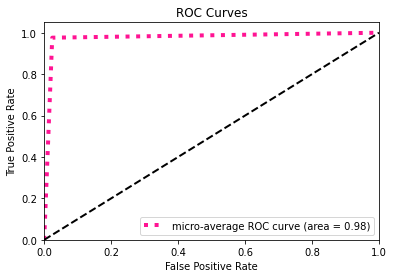

In [59]:
#Decision Tree
skplt.metrics.plot_roc_curve(Y_test, dt.predict_proba(X_test), curves=('micro avg'))
plt.show()

C:\Users\pdeov\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


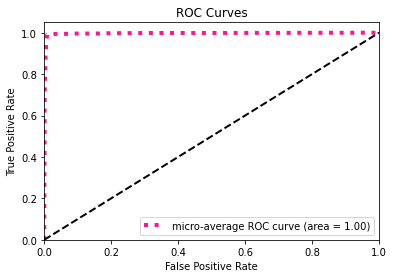

In [60]:
#Random FOrest
skplt.metrics.plot_roc_curve(Y_test, rf.predict_proba(X_test), curves=('micro avg'))
plt.show()

C:\Users\pdeov\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


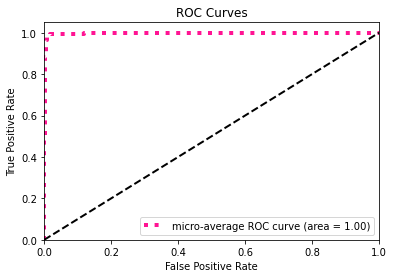

In [61]:
#XGBoost
skplt.metrics.plot_roc_curve(Y_test, xgb.predict_proba(X_test), curves=('micro avg'))
plt.show()

C:\Users\pdeov\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


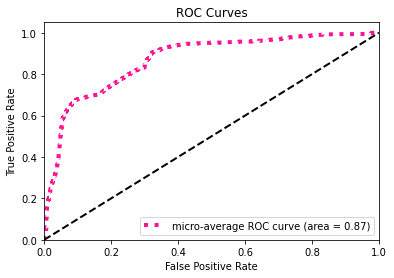

In [62]:
#SVC
skplt.metrics.plot_roc_curve(Y_test, svclassifier.predict_proba(X_test), curves=('micro avg'))
plt.show()

In [63]:
#Let us build a confusion matrix for Random forest Moddel
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, rf.predict(X_test))

array([[1711,    3],
       [  20,  516]], dtype=int64)

In [64]:
Y_test.value_counts()

0    1714
1     536
Name: left, dtype: int64

In [65]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,satisfaction_level,0.281157
1,time_spend_company,0.233533
2,average_montly_hours,0.154934
3,number_project,0.145385
4,last_evaluation,0.136051
5,Work_accident_1,0.013753
6,salary_low,0.007892
7,Department_technical,0.004512
8,salary_medium,0.004340
9,Department_sales,0.004157


<AxesSubplot:xlabel='importance', ylabel='index'>

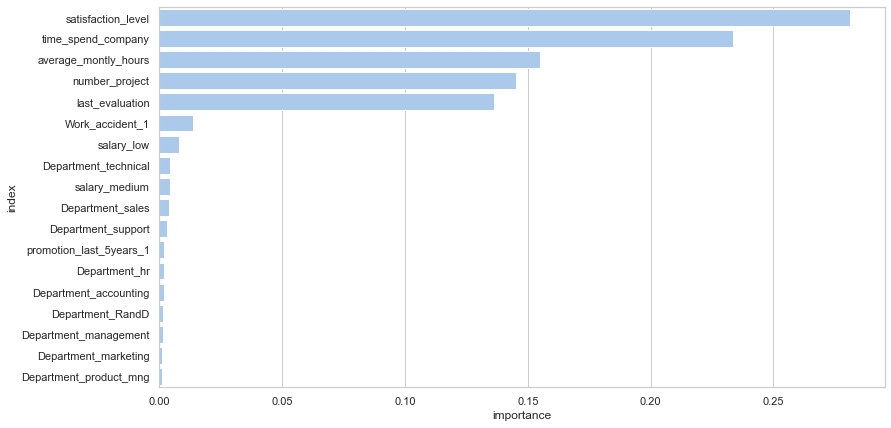

In [66]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

In [67]:
rf.predict_proba(X_test)

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       ...,
       [0.  , 1.  ],
       [0.01, 0.99],
       [1.  , 0.  ]])

We also saw that from the feature importance that satisfaction is a major contributor to the employee turnover at the company. The company should primarily make sure that the companies policies are geared towards satisfying the people and keeping them happy under stressful circumstances. The company can take their employees like twice a year to an outing or team lunch which will make them very happy.
The company should make sure it promotes more number of employees every year because only 300 out of the 15000 were promoted in the last 5 years, which averages to 60 per year, which is way too less
The company should make sure that the employees have ideal number of projects and are not bombarded with multiple projects or are they left jobless to keep them going

Special care should be given to those who have spent more than 4 years at the company, because they are more likely to leave the company and are very expensive to replace. 